In [59]:
#Importing packages
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [60]:
data = pd.read_excel("m407_renal.xlsx")
data = data.drop('renal_response_group', axis=1)


In [41]:
data

,Sample,Gynosaponin I,Maduramicin,Notoginsenoside Fe,Protopanaxadiol 3-glucoside 20-arabinosyl-(1-2)-glucoside,Vinaginsenoside R16,Vinaginsenoside R17,3-O-Sulfogalactosylceramide (d18:124:0),Anisole,Benzyl alcohol,...,Alpha-Linolenic acid,Calendic acid,Gamma-Linolenic acid,Linolenelaidic acid,Punicic acid,Hexahydro-23alpha-dimethylspiro13-dithiolo45-bfuran-23(2H)-furan,Hexahydro-24-dimethylspiro13-dithiolo45-cfuran-23(2H)-furan,Sialyl Lea tetra,Sialyl Lex tetra,Aspartylglycosamine
0,YW_200123_M407_098,13.444514,13.444514,13.444514,13.444514,13.444514,13.444514,13.877750,16.216965,16.216965,...,17.304796,17.304796,17.304796,17.304796,17.304796,-4.605170,-4.605170,9.856223,9.856223,15.980665
1,YW_200123_M407_152,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,14.120643,16.749580,16.749580,...,17.266236,17.266236,17.266236,17.266236,17.266236,13.092804,13.092804,12.128505,12.128505,15.114280
2,YW_200123_M407_236,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,14.814781,16.647653,16.647653,...,18.274641,18.274641,18.274641,18.274641,18.274641,15.241018,15.241018,14.822465,14.822465,15.714483
3,YW_200202_M407_020,13.771700,13.771700,13.771700,13.771700,13.771700,13.771700,14.299162,17.454349,17.454349,...,18.421110,18.421110,18.421110,18.421110,18.421110,14.759246,14.759246,14.234729,14.234729,15.564638
4,YW_200202_M407_056,13.296721,13.296721,13.296721,13.296721,13.296721,13.296721,13.538333,15.728799,15.728799,...,16.641507,16.641507,16.641507,16.641507,16.641507,13.635493,13.635493,12.618396,12.618396,15.706667
5,YW_200202_M407_062,13.054912,13.054912,13.054912,13.054912,13.054912,13.054912,14.311886,14.451312,14.451312,...,17.024003,17.024003,17.024003,17.024003,17.024003,14.467331,14.467331,12.945653,12.945653,15.484242
6,YW_200202_M407_068,14.027154,14.027154,14.027154,14.027154,14.027154,14.027154,13.824845,16.064840,16.064840,...,17.428661,17.428661,17.428661,17.428661,17.428661,14.034303,14.034303,12.869369,12.869369,15.615565
7,YW_200202_M407_086,12.902468,12.902468,12.902468,12.902468,12.902468,12.902468,13.737778,14.639733,14.639733,...,16.314117,16.314117,16.314117,16.314117,16.314117,14.601583,14.601583,14.320917,14.320917,15.419668
8,YW_200202_M407_092,12.914716,12.914716,12.914716,12.914716,12.914716,12.914716,14.386110,16.130396,16.130396,...,17.002057,17.002057,17.002057,17.002057,17.002057,13.817526,13.817526,14.370254,14.370254,15.807933
9,YW_200202_M407_206,12.834433,12.834433,12.834433,12.834433,12.834433,12.834433,14.654977,14.435556,14.435556,...,16.725428,16.725428,16.725428,16.725428,16.725428,15.135727,15.135727,12.987368,12.987368,15.264757


In [61]:
# droppinf nas
data = data.dropna()

In [62]:
#setting the first column as index
data = data.set_index('Sample')
data.index.names = [None]

In [63]:
data.describe()

,Gynosaponin I,Maduramicin,Notoginsenoside Fe,Protopanaxadiol 3-glucoside 20-arabinosyl-(1-2)-glucoside,Vinaginsenoside R16,Vinaginsenoside R17,3-O-Sulfogalactosylceramide (d18:124:0),Anisole,Benzyl alcohol,m-Cresol,...,Alpha-Linolenic acid,Calendic acid,Gamma-Linolenic acid,Linolenelaidic acid,Punicic acid,Hexahydro-23alpha-dimethylspiro13-dithiolo45-bfuran-23(2H)-furan,Hexahydro-24-dimethylspiro13-dithiolo45-cfuran-23(2H)-furan,Sialyl Lea tetra,Sialyl Lex tetra,Aspartylglycosamine
count,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,...,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000
mean,9.509028,9.509028,9.509028,9.509028,9.509028,9.509028,13.959010,14.988261,14.988261,14.988261,...,17.331952,17.331952,17.331952,17.331952,17.331952,9.958986,9.958986,12.716026,12.716026,14.727762
std,8.005317,8.005317,8.005317,8.005317,8.005317,8.005317,2.580032,3.905608,3.905608,3.905608,...,0.647605,0.647605,0.647605,0.647605,0.647605,7.803221,7.803221,4.328219,4.328219,3.808482
min,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,...,16.301283,16.301283,16.301283,16.301283,16.301283,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170
25%,11.039695,11.039695,11.039695,11.039695,11.039695,11.039695,14.147220,15.428404,15.428404,15.428404,...,16.737563,16.737563,16.737563,16.737563,16.737563,12.767525,12.767525,13.201239,13.201239,15.245462
50%,13.444514,13.444514,13.444514,13.444514,13.444514,13.444514,14.406343,15.758811,15.758811,15.758811,...,17.304796,17.304796,17.304796,17.304796,17.304796,13.635493,13.635493,14.026079,14.026079,15.484242
75%,14.423017,14.423017,14.423017,14.423017,14.423017,14.423017,14.549410,16.163713,16.163713,16.163713,...,17.742003,17.742003,17.742003,17.742003,17.742003,14.358292,14.358292,14.336925,14.336925,15.706624
max,16.220188,16.220188,16.220188,16.220188,16.220188,16.220188,14.837242,17.454349,17.454349,17.454349,...,19.275293,19.275293,19.275293,19.275293,19.275293,16.213381,16.213381,14.822465,14.822465,16.052257


In [64]:
# # Calculate mean and standard deviation for each row
# row_means = data_q.mean(axis=1)
# row_stds = data_q.std(axis=1)

# # Calculate RSD for each row
# rsd = (row_stds / row_means) * 100

# # Define threshold for RSD
# threshold = 0.3

# # Identify rows where RSD exceeds the threshold
# outliers = data_q[rsd > threshold]

# # Remove outliers from the dataset
# filtered_data = data_q[rsd <= threshold]

# print("Filtered Data:")
# print(filtered_data)

In [65]:
# # Count the number of values less than 2 across the DataFrame
# count_less_than_2 = (data < 2).sum().sum()

# print("Number of values less than 2 across the DataFrame:", count_less_than_2)

Number of values less than 2 across the DataFrame: 7225


In [46]:

# # Check which values are less than 1
# less_than_1 = data < 1

# # Check across columns (features) if any value is less than 1
# features_with_less_than_1 = less_than_1.any()

# # Count how many features have at least one value less than 1
# num_features_with_less_than_1 = features_with_less_than_1.sum()

# print("Number of features with at least one value less than 1:", num_features_with_less_than_1)

Number of features with at least one value less than 1: 445


In [66]:
# Performing log transformation
data = np.log2(data +0.01)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: invalid value encountered in log2
  result = func(self.values, **kwargs)


In [67]:
from sklearn.preprocessing import StandardScaler

# Assuming 'data' is your DataFrame
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Convert scaled data back to DataFrame (if needed)
data_scaled_df = pd.DataFrame(data_scaled, columns=data.columns, index=data.index)


In [75]:
data_scaled_df

,Gynosaponin I,Maduramicin,Notoginsenoside Fe,Protopanaxadiol 3-glucoside 20-arabinosyl-(1-2)-glucoside,Vinaginsenoside R16,Vinaginsenoside R17,3-O-Sulfogalactosylceramide (d18:124:0),Anisole,Benzyl alcohol,m-Cresol,...,Alpha-Linolenic acid,Calendic acid,Gamma-Linolenic acid,Linolenelaidic acid,Punicic acid,Hexahydro-23alpha-dimethylspiro13-dithiolo45-bfuran-23(2H)-furan,Hexahydro-24-dimethylspiro13-dithiolo45-cfuran-23(2H)-furan,Sialyl Lea tetra,Sialyl Lex tetra,Aspartylglycosamine
YW_200123_M407_098,-0.286803,-0.286803,-0.286803,-0.286803,-0.286803,-0.286803,-1.045280,0.684128,0.684128,0.684128,...,-0.024280,-0.024280,-0.024280,-0.024280,-0.024280,NaN,NaN,-3.700618,-3.700618,1.357893
YW_200123_M407_152,NaN,NaN,NaN,NaN,NaN,NaN,-0.436071,1.381662,1.381662,1.381662,...,-0.085061,-0.085061,-0.085061,-0.085061,-0.085061,-1.093285,-1.093285,-1.351781,-1.351781,-0.894693
YW_200123_M407_236,NaN,NaN,NaN,NaN,NaN,NaN,1.248860,1.249906,1.249906,1.249906,...,1.461520,1.461520,1.461520,1.461520,1.461520,1.393853,1.393853,0.919658,0.919658,0.679083
YW_200202_M407_020,-0.034011,-0.034011,-0.034011,-0.034011,-0.034011,-0.034011,0.005039,2.271334,2.271334,2.271334,...,1.679036,1.679036,1.679036,1.679036,1.679036,0.867999,0.867999,0.461468,0.461468,0.291876
YW_200202_M407_056,-0.403014,-0.403014,-0.403014,-0.403014,-0.403014,-0.403014,-1.914672,0.024397,0.024397,0.024397,...,-1.089168,-1.089168,-1.089168,-1.089168,-1.089168,-0.428448,-0.428448,-0.903407,-0.903407,0.658977
YW_200202_M407_062,-0.595962,-0.595962,-0.595962,-0.595962,-0.595962,-0.595962,0.036268,-1.803950,-1.803950,-1.803950,...,-0.470017,-0.470017,-0.470017,-0.470017,-0.470017,0.540963,0.540963,-0.613473,-0.613473,0.082593
YW_200202_M407_068,0.159221,0.159221,0.159221,0.159221,0.159221,0.159221,-1.179384,0.480691,0.480691,0.480691,...,0.170053,0.170053,0.170053,0.170053,0.170053,0.043482,0.043482,-0.680397,-0.680397,0.423891
YW_200202_M407_086,-0.719447,-0.719447,-0.719447,-0.719447,-0.719447,-0.719447,-1.401204,-1.524356,-1.524356,-1.524356,...,-1.630519,-1.630519,-1.630519,-1.630519,-1.630519,0.692178,0.692178,0.529829,0.529829,-0.086294
YW_200202_M407_092,-0.709472,-0.709472,-0.709472,-0.709472,-0.709472,-0.709472,0.217893,0.568595,0.568595,0.568595,...,-0.505163,-0.505163,-0.505163,-0.505163,-0.505163,-0.211352,-0.211352,0.568776,0.568776,0.918696
YW_200202_M407_206,-0.775030,-0.775030,-0.775030,-0.775030,-0.775030,-0.775030,0.868053,-1.827496,-1.827496,-1.827496,...,-0.952114,-0.952114,-0.952114,-0.952114,-0.952114,1.280360,1.280360,-0.577043,-0.577043,-0.494343


In [77]:
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np



imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(data_scaled_df)
 
X = imputer.transform(data_scaled_df)
print(X)

[[-2.86803080e-01 -2.86803080e-01 -2.86803080e-01 ... -3.70061797e+00
  -3.70061797e+00  1.35789313e+00]
 [-3.74568101e-15 -3.74568101e-15 -3.74568101e-15 ... -1.35178148e+00
  -1.35178148e+00 -8.94692991e-01]
 [-3.74568101e-15 -3.74568101e-15 -3.74568101e-15 ...  9.19657681e-01
   9.19657681e-01  6.79082693e-01]
 ...
 [ 5.34443554e-01  5.34443554e-01  5.34443554e-01 ...  7.45718987e-01
   7.45718987e-01  1.53853876e+00]
 [ 2.43551482e-01  2.43551482e-01  2.43551482e-01 ...  1.71871064e-15
   1.71871064e-15 -1.26737817e+00]
 [-3.74568101e-15 -3.74568101e-15 -3.74568101e-15 ...  1.71871064e-15
   1.71871064e-15  2.54486258e-01]]


<Axes: >

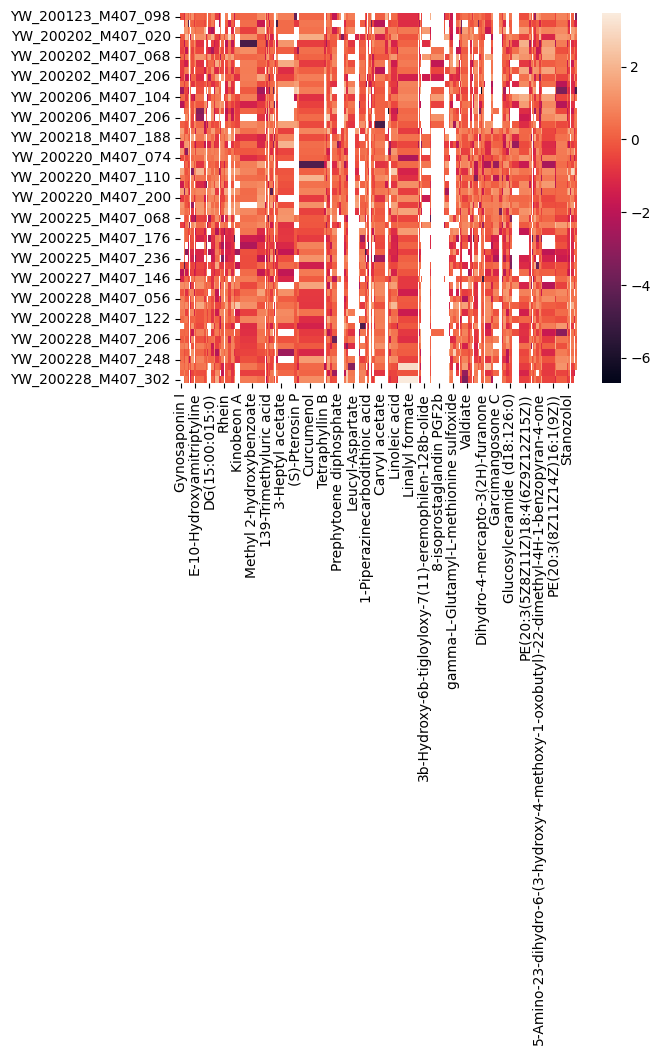

In [68]:
sns.heatmap(data = data_scaled_df)

In [50]:
# from sklearn.impute import SimpleImputer
# from sklearn.cluster import KMeans
# import numpy as np

# # Replace NaN values with the mean of each column
# imputer = SimpleImputer(strategy='median')
# scaled_df = imputer.fit_transform(data_scaled_df)

In [73]:
# Drop rows with NaN values
data_scaled_df

# Proceed with clustering


,Gynosaponin I,Maduramicin,Notoginsenoside Fe,Protopanaxadiol 3-glucoside 20-arabinosyl-(1-2)-glucoside,Vinaginsenoside R16,Vinaginsenoside R17,3-O-Sulfogalactosylceramide (d18:124:0),Anisole,Benzyl alcohol,m-Cresol,...,Alpha-Linolenic acid,Calendic acid,Gamma-Linolenic acid,Linolenelaidic acid,Punicic acid,Hexahydro-23alpha-dimethylspiro13-dithiolo45-bfuran-23(2H)-furan,Hexahydro-24-dimethylspiro13-dithiolo45-cfuran-23(2H)-furan,Sialyl Lea tetra,Sialyl Lex tetra,Aspartylglycosamine
YW_200123_M407_098,-0.286803,-0.286803,-0.286803,-0.286803,-0.286803,-0.286803,-1.045280,0.684128,0.684128,0.684128,...,-0.024280,-0.024280,-0.024280,-0.024280,-0.024280,NaN,NaN,-3.700618,-3.700618,1.357893
YW_200123_M407_152,NaN,NaN,NaN,NaN,NaN,NaN,-0.436071,1.381662,1.381662,1.381662,...,-0.085061,-0.085061,-0.085061,-0.085061,-0.085061,-1.093285,-1.093285,-1.351781,-1.351781,-0.894693
YW_200123_M407_236,NaN,NaN,NaN,NaN,NaN,NaN,1.248860,1.249906,1.249906,1.249906,...,1.461520,1.461520,1.461520,1.461520,1.461520,1.393853,1.393853,0.919658,0.919658,0.679083
YW_200202_M407_020,-0.034011,-0.034011,-0.034011,-0.034011,-0.034011,-0.034011,0.005039,2.271334,2.271334,2.271334,...,1.679036,1.679036,1.679036,1.679036,1.679036,0.867999,0.867999,0.461468,0.461468,0.291876
YW_200202_M407_056,-0.403014,-0.403014,-0.403014,-0.403014,-0.403014,-0.403014,-1.914672,0.024397,0.024397,0.024397,...,-1.089168,-1.089168,-1.089168,-1.089168,-1.089168,-0.428448,-0.428448,-0.903407,-0.903407,0.658977
YW_200202_M407_062,-0.595962,-0.595962,-0.595962,-0.595962,-0.595962,-0.595962,0.036268,-1.803950,-1.803950,-1.803950,...,-0.470017,-0.470017,-0.470017,-0.470017,-0.470017,0.540963,0.540963,-0.613473,-0.613473,0.082593
YW_200202_M407_068,0.159221,0.159221,0.159221,0.159221,0.159221,0.159221,-1.179384,0.480691,0.480691,0.480691,...,0.170053,0.170053,0.170053,0.170053,0.170053,0.043482,0.043482,-0.680397,-0.680397,0.423891
YW_200202_M407_086,-0.719447,-0.719447,-0.719447,-0.719447,-0.719447,-0.719447,-1.401204,-1.524356,-1.524356,-1.524356,...,-1.630519,-1.630519,-1.630519,-1.630519,-1.630519,0.692178,0.692178,0.529829,0.529829,-0.086294
YW_200202_M407_092,-0.709472,-0.709472,-0.709472,-0.709472,-0.709472,-0.709472,0.217893,0.568595,0.568595,0.568595,...,-0.505163,-0.505163,-0.505163,-0.505163,-0.505163,-0.211352,-0.211352,0.568776,0.568776,0.918696
YW_200202_M407_206,-0.775030,-0.775030,-0.775030,-0.775030,-0.775030,-0.775030,0.868053,-1.827496,-1.827496,-1.827496,...,-0.952114,-0.952114,-0.952114,-0.952114,-0.952114,1.280360,1.280360,-0.577043,-0.577043,-0.494343


In [72]:
# Drop rows with NaN values



,Gynosaponin I,Maduramicin,Notoginsenoside Fe,Protopanaxadiol 3-glucoside 20-arabinosyl-(1-2)-glucoside,Vinaginsenoside R16,Vinaginsenoside R17,3-O-Sulfogalactosylceramide (d18:124:0),Anisole,Benzyl alcohol,m-Cresol,...,Alpha-Linolenic acid,Calendic acid,Gamma-Linolenic acid,Linolenelaidic acid,Punicic acid,Hexahydro-23alpha-dimethylspiro13-dithiolo45-bfuran-23(2H)-furan,Hexahydro-24-dimethylspiro13-dithiolo45-cfuran-23(2H)-furan,Sialyl Lea tetra,Sialyl Lex tetra,Aspartylglycosamine


In [ ]:
from sklearn.cluster import KMeans
import numpy as np

# Set seed for reproducibility
np.random.seed(42)  # You can change 42 to any integer value you want

sse = []
k_rng = range(1, 10)
for k in k_rng:
    km = KMeans(n_clusters=k, random_state=42)  # Set random_state
    km.fit(data_cleaned)
    sse.append(km.inertia_)


In [52]:
#sum of sqaured error(array)
sse

[27929.33409111462,
 24633.415097052046,
 23128.1174123761,
 21880.86110062626,
 21242.129985835934,
 20490.41449903403,
 19706.794252812415,
 18765.351362872017,
 18055.955356729635]

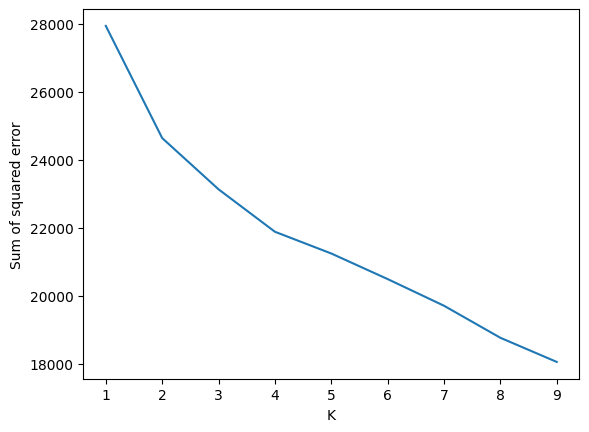

In [53]:
#plotting the elbow plot
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [54]:
from sklearn.cluster import KMeans
import numpy as np

# Set seed for reproducibility
np.random.seed(42)

# Assuming data_scaled_df is your scaled DataFrame
km = KMeans(n_clusters=2, random_state=42)  # Set random_state
yp = km.fit_predict(scaled_df)
yp


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0], dtype=int32)

In [58]:
silhouette_avg = silhouette_score(scaled_df, yp)
print("The average silhouette_score is :", silhouette_avg)

The average silhouette_score is : 0.09833887649528265


In [ ]:
# Dimensionality reduction of the data in order to visualize it
# Select columns for PCA, excluding the 'cluster' column
columns_for_pca = [col for col in data.columns if col != 'cluster']
data_reduced = PCA(n_components=2).fit_transform(scaled_df[columns_for_pca])

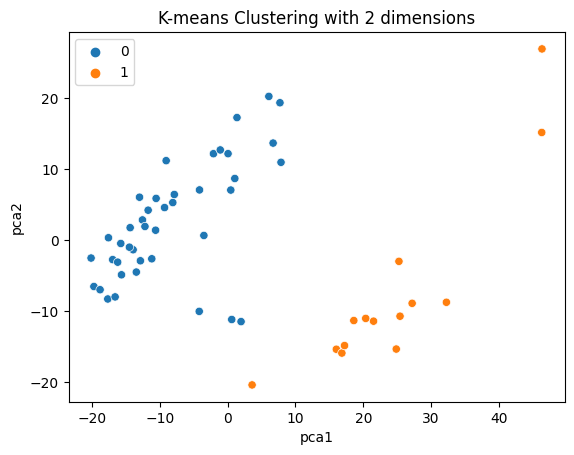

In [40]:
# Visualizing the kmeans clustering after linear dimensionality reduction
results = pd.DataFrame(data_reduced, columns=['pca1', 'pca2'])
sns.scatterplot(x="pca1", y="pca2", hue=km.labels_, data=results)
plt.title('K-means Clustering with 2 dimensions')
plt.show()

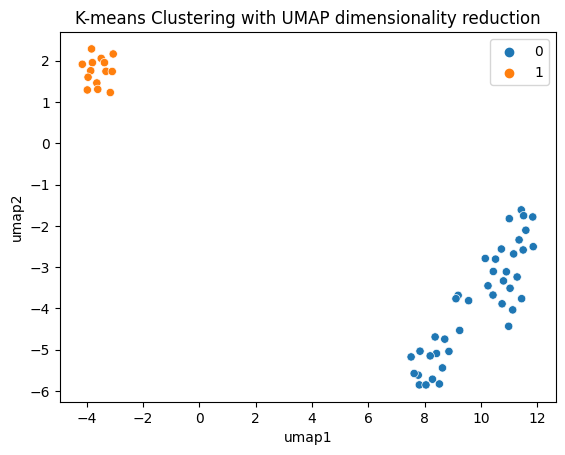

In [41]:
# Trying umap
import umap
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you already have your data and km (KMeans model) defined

# Perform UMAP dimensionality reduction
umap_reducer = umap.UMAP(n_components=2)
data_reduced_umap = umap_reducer.fit_transform(data)

# Create DataFrame with reduced data
results_umap = pd.DataFrame(data_reduced_umap, columns=['umap1', 'umap2'])

# Plotting
sns.scatterplot(x="umap1", y="umap2", hue=km.labels_, data=results_umap)
plt.title('K-means Clustering with UMAP dimensionality reduction')
plt.show()


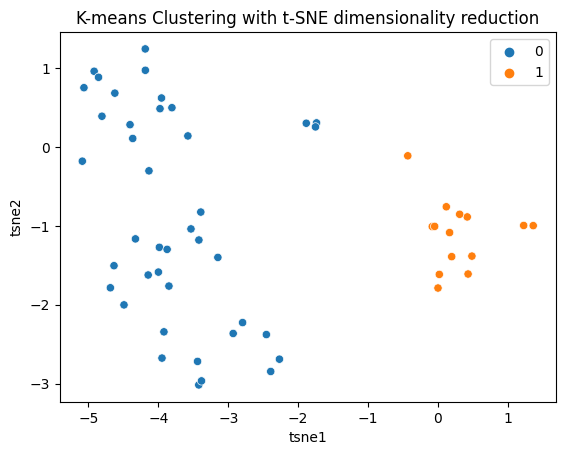

In [42]:
# Trying tsne
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you already have your data and km (KMeans model) defined

# Perform t-SNE dimensionality reduction
tsne_reducer = TSNE(n_components=2)
data_reduced_tsne = tsne_reducer.fit_transform(data)

# Create DataFrame with reduced data
results_tsne = pd.DataFrame(data_reduced_tsne, columns=['tsne1', 'tsne2'])

# Plotting
sns.scatterplot(x="tsne1", y="tsne2", hue=km.labels_, data=results_tsne)
plt.title('K-means Clustering with t-SNE dimensionality reduction')
plt.show()


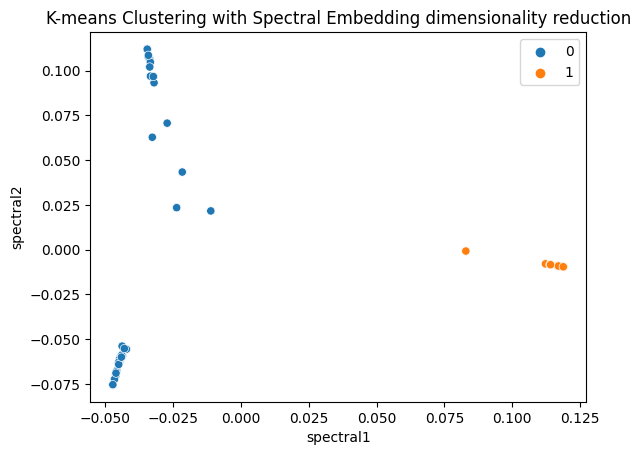

In [43]:
# Trying spectral embedding
from sklearn.manifold import SpectralEmbedding
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you already have your data and km (KMeans model) defined

# Perform spectral embedding dimensionality reduction
spectral_reducer = SpectralEmbedding(n_components=2)
data_reduced_spectral = spectral_reducer.fit_transform(data)

# Create DataFrame with reduced data
results_spectral = pd.DataFrame(data_reduced_spectral, columns=['spectral1', 'spectral2'])

# Plotting
sns.scatterplot(x="spectral1", y="spectral2", hue=km.labels_, data=results_spectral)
plt.title('K-means Clustering with Spectral Embedding dimensionality reduction')
plt.show()
